In [153]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.naive_bayes import GaussianNB, CategoricalNB, BernoulliNB
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from scipy.signal import savgol_filter
import matplotlib.ticker as plticker


In [154]:
# writer = pd.ExcelWriter("Ket qua phan loai khong dao ham.xlsx", engine='xlsxwriter')

In [155]:
data = pd.read_excel("../../data/Dataset_HPLC.xlsx", sheet_name="Vungtrong (140)")
data.head(5)

,No.,Name,Group,%CM,%CA,%CAL,600,602,604,606,...,3982,3984,3986,3988,3990,3992,3994,3996,3998,4000
0,1,21.1.8.YB-13,1,2.57,0.09,9.83,0.222,0.223,0.221,0.217,...,-0.006,-0.006,-0.006,-0.006,-0.006,-0.006,-0.006,-0.006,-0.006,-0.006
1,2,21.1.8.YB-24,1,0.69,0.04,3.75,0.263,0.261,0.257,0.257,...,-0.007,-0.007,-0.007,-0.007,-0.006,-0.007,-0.007,-0.007,-0.007,-0.007
2,3,21.1.8.YB-38,1,0.43,0.05,5.53,0.252,0.253,0.253,0.252,...,-0.006,-0.007,-0.007,-0.007,-0.006,-0.007,-0.007,-0.007,-0.007,-0.007
3,4,21.1.8.YB-40,1,2.04,0.06,5.21,0.259,0.258,0.259,0.259,...,-0.008,-0.009,-0.009,-0.009,-0.008,-0.008,-0.008,-0.009,-0.009,-0.009
4,5,21.1.8.YB-41,1,0.13,0.09,4.60,0.206,0.203,0.200,0.198,...,0.000,-0.001,0.000,0.001,0.001,0.000,0.000,-0.001,-0.001,-0.001


In [156]:
y = data["Group"]
# le = LabelEncoder()
# y = le.fit_transform(y)
X = data.iloc[:, 6:]
X.columns = X.columns.astype(str)
cols = X.columns
# print(np.unique(y))
# print(le.inverse_transform(np.unique(y)))

In [157]:
# X = savgol_filter(X, window_length=25, polyorder=5, deriv=0)

In [158]:
X = pd.DataFrame(X, columns=cols)

/var/folders/7m/q4tfxjb53l137r3zt2w5xgb40000gn/T/ipykernel_54883/495723894.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45, ha='right')


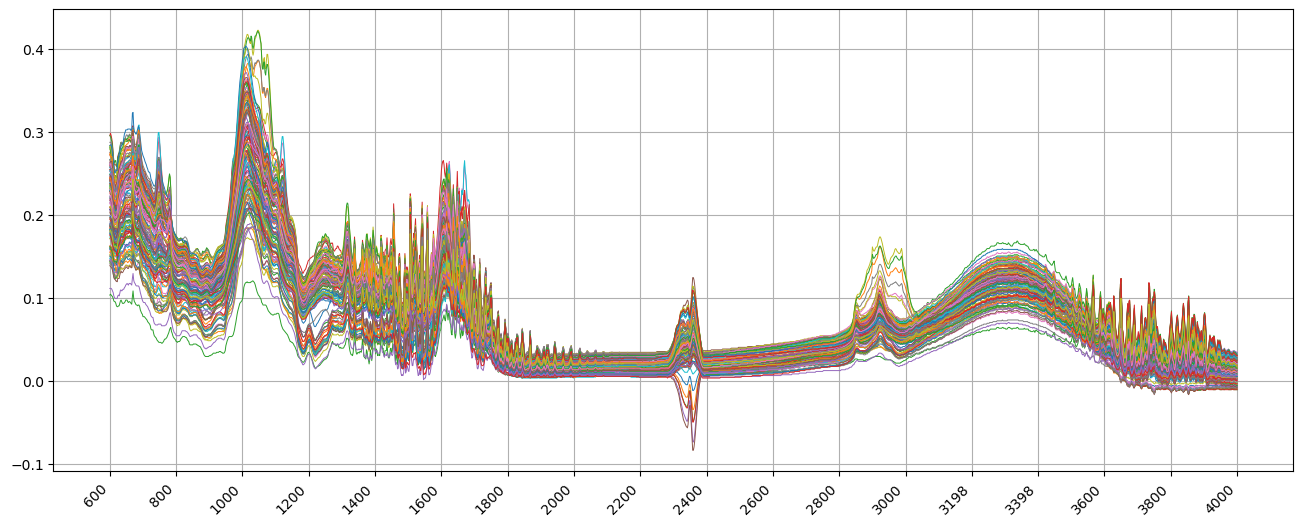

In [159]:
fig, ax = plt.subplots(figsize = (16, 6))
ax.plot(X.T, linewidth = 0.7)
loc = plticker.MultipleLocator(base=100.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
# ax.set_xticks(rotation = 90)
plt.grid()
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, ha='right')
plt.show()

In [160]:
X = np.array(X)  # In case it's not already a NumPy array
y = np.array(y)

n_classes = len(np.unique(y))
# Define how many samples per class you want in the validation set
n_test_samples_per_class = int(len(X) * 0.25 / n_classes)  # Modify this based on your need

# Get unique class labels
classes = np.unique(y)
# Lists to hold train and test data
X_train_list, X_test_list = [], []
y_train_list, y_test_list = [], []

# For each class, split data to have equal test size
for cls in classes:
    # Get indices for this class
    class_indices = np.where(y == cls)[0]
    
    # Split the data for this class
    X_class, X_class_test, y_class, y_class_test = train_test_split(
        X[class_indices], y[class_indices], test_size=n_test_samples_per_class, random_state=42
    )
    
    # Append the splits to the train/test lists
    X_train_list.append(X_class)
    X_test_list.append(X_class_test)
    y_train_list.append(y_class)
    y_test_list.append(y_class_test)

# Combine back into arrays
X_train = np.vstack(X_train_list)  # Combine all classes' training data
X_test = np.vstack(X_test_list)      # Combine all classes' test data
y_train = np.hstack(y_train_list)  # Combine all classes' training labels
y_test = np.hstack(y_test_list)      # Combine all classes' test labels

print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_test.shape, y_test.shape)

Training set shape: (107, 1701) (107,)
Validation set shape: (32, 1701) (32,)


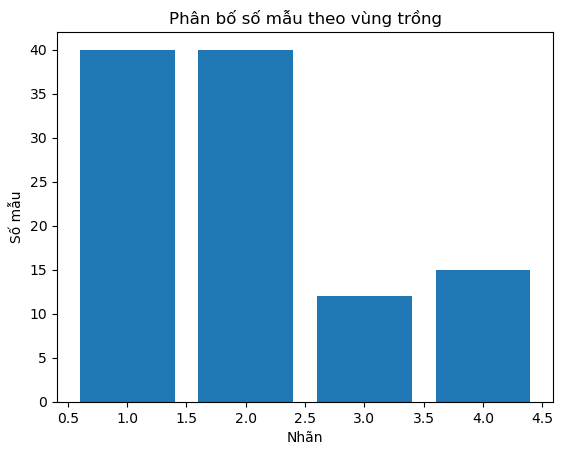

In [161]:
# Count occurrences of each label
unique, counts = np.unique(y_train, return_counts=True)
labels = unique
# Plotting
plt.bar(labels, counts)
plt.xlabel('Nhãn')
plt.ylabel('Số mẫu')
plt.title('Phân bố số mẫu theo vùng trồng')
plt.show()

In [162]:
from imblearn.over_sampling import SMOTE
# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(random_state=42)
# Fit the model to generate the data.
X_train, y_train = sm.fit_resample(X_train, y_train)

In [163]:
X_SMOTE = sm.fit_resample(X, y)

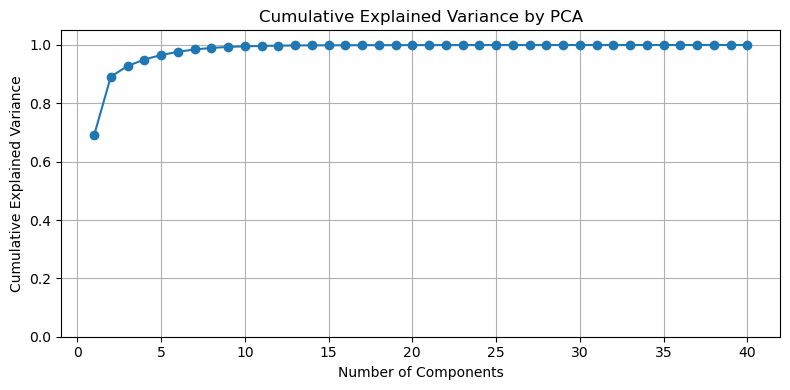

In [164]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


pca = PCA(n_components=40)
pca.fit(X)

# Tính cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Vẽ biểu đồ
plt.figure(figsize=(8, 4))
plt.plot(range(1, 41), cumulative_variance, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance by PCA")
plt.ylim(0, 1.05)
plt.grid(True)
plt.tight_layout()
plt.show()

In [165]:
# import matplotlib.pyplot as plt
# from sklearn.decomposition import PCA
# from imblearn.over_sampling import SMOTE
# import seaborn as sns
# import pandas as pd
# from collections import Counter

# # 1. Lưu dữ liệu gốc
# X_train_orig = X_train.copy()
# y_train_orig = y_train.copy()

# # 2. In phân bố trước SMOTE
# print("Phân bố trước SMOTE:", Counter(y_train_orig))

# # 3. Áp dụng SMOTE
# sm = SMOTE(random_state=42)
# X_train_res, y_train_res = sm.fit_resample(X_train_orig, y_train_orig)

# print("Phân bố sau SMOTE:", Counter(y_train_res))

# # 4. Kiểm tra có sinh dữ liệu mới không
# n_orig = len(X_train_orig)
# n_res = len(X_train_res)

# # 5. Giảm chiều với PCA
# pca = PCA(n_components=2)
# X_pca_orig = pca.fit_transform(X_train_orig)

# if n_res > n_orig:
#     # Có dữ liệu mới
#     X_train_new = X_train_res[n_orig:]
#     y_train_new = y_train_res[n_orig:]
#     X_pca_new = pca.transform(X_train_new)

#     # 6. Tạo DataFrame cho cả gốc và SMOTE
#     df_orig = pd.DataFrame(X_pca_orig, columns=["PC1", "PC2"])
#     df_orig["Label"] = y_train_orig
#     df_orig["Type"] = "original"

#     df_new = pd.DataFrame(X_pca_new, columns=["PC1", "PC2"])
#     df_new["Label"] = y_train_new
#     df_new["Type"] = "smote"

#     df_all = pd.concat([df_orig, df_new], ignore_index=True)

#     # 7. Vẽ
#     plt.figure(figsize=(8, 6))
#     sns.scatterplot(
#         data=df_all,
#         x="PC1", y="PC2",
#         hue="Label",
#         style="Type",
#         markers={"original": "^", "smote": "o"},
#         palette="Set1",
#         s=70,
#         alpha=0.8
#     )
#     plt.title("PCA 2D SMOTE")
#     plt.xlabel("PC1")
#     plt.ylabel("PC2")
#     plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
#     plt.tight_layout()
#     plt.show()

# else:
#     # Không có dữ liệu mới
#     print("⚠️ SMOTE không tạo ra mẫu mới – Chỉ vẽ dữ liệu gốc")

#     df_orig = pd.DataFrame(X_pca_orig, columns=["PC1", "PC2"])
#     df_orig["label"] = y_train_orig
#     df_orig["type"] = "original"

#     plt.figure(figsize=(8, 6))
#     sns.scatterplot(
#         data=df_orig,
#         x="PC1", y="PC2",
#         hue="label",
#         style="type",
#         markers={"original": "^"},
#         palette="Set1",
#         s=70,
#         alpha=0.8
#     )
#     plt.title("PCA 2D SMOTE")
#     plt.xlabel("PC1")
#     plt.ylabel("PC2")
#     plt.legend(title="Lớp", bbox_to_anchor=(1.05, 1), loc='upper left')
#     plt.tight_layout()
#     plt.show()


Phân bố trước SMOTE: Counter({np.int64(1): 40, np.int64(2): 40, np.int64(3): 40, np.int64(4): 40})
Phân bố sau SMOTE: Counter({np.int64(1): 40, np.int64(2): 40, np.int64(3): 40, np.int64(4): 40})
⚠️ SMOTE không tạo ra mẫu mới – Chỉ vẽ dữ liệu gốc


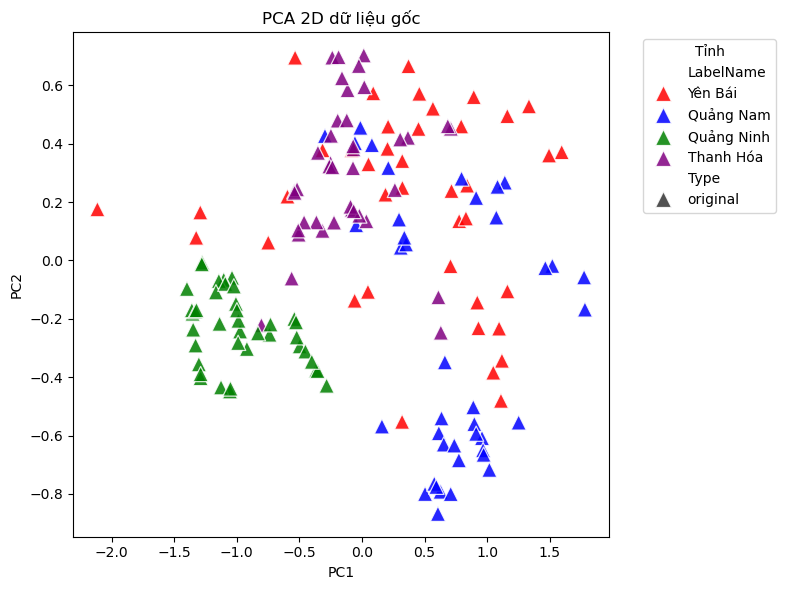

In [166]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
import seaborn as sns
import pandas as pd
from collections import Counter

# Mapping nhãn -> tên + màu
label_to_name = {
    1: "Yên Bái",
    2: "Quảng Nam",
    3: "Quảng Ninh",
    4: "Thanh Hóa"
}

labelname_to_color = {
    "Yên Bái": "red",
    "Quảng Nam": "blue",
    "Quảng Ninh": "green",
    "Thanh Hóa": "purple"
}

# 1. Lưu dữ liệu gốc
X_train_orig = X_train.copy()
y_train_orig = y_train.copy()

# 2. In phân bố trước SMOTE
print("Phân bố trước SMOTE:", Counter(y_train_orig))

# 3. Áp dụng SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_orig, y_train_orig)

print("Phân bố sau SMOTE:", Counter(y_train_res))

# 4. Kiểm tra có sinh dữ liệu mới không
n_orig = len(X_train_orig)
n_res = len(X_train_res)

# 5. Giảm chiều với PCA
pca = PCA(n_components=2)
X_pca_orig = pca.fit_transform(X_train_orig)

if n_res > n_orig:
    # Có dữ liệu mới
    X_train_new = X_train_res[n_orig:]
    y_train_new = y_train_res[n_orig:]
    X_pca_new = pca.transform(X_train_new)

    # 6. Tạo DataFrame
    df_orig = pd.DataFrame(X_pca_orig, columns=["PC1", "PC2"])
    df_orig["Label"] = y_train_orig
    df_orig["Type"] = "original"

    df_new = pd.DataFrame(X_pca_new, columns=["PC1", "PC2"])
    df_new["Label"] = y_train_new
    df_new["Type"] = "smote"

    df_all = pd.concat([df_orig, df_new], ignore_index=True)

    # Đặt tên tỉnh
    df_all["Label"] = df_all["Label"].map(label_to_name)

    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        data=df_all,
        x="PC1", y="PC2",
        hue="Label",
        style="Type",
        markers={"original": "^", "smote": "o"},
        palette=labelname_to_color,
        s=120,
        alpha=0.85
    )
    plt.title("PCA 2D SMOTE")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

else:
    # Không có dữ liệu mới
    print("⚠️ SMOTE không tạo ra mẫu mới – Chỉ vẽ dữ liệu gốc")

    df_orig = pd.DataFrame(X_pca_orig, columns=["PC1", "PC2"])
    df_orig["Label"] = y_train_orig
    df_orig["Type"] = "original"
    df_orig["LabelName"] = df_orig["Label"].map(label_to_name)

    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        data=df_orig,
        x="PC1", y="PC2",
        hue="LabelName",
        style="Type",
        markers={"original": "^"},
        palette=labelname_to_color,
        s=120,
        alpha=0.85
    )
    plt.title("PCA 2D dữ liệu gốc")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.legend(title="Tỉnh", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


In [167]:
# # import matplotlib.pyplot as plt
# from sklearn.decomposition import PCA
# from imblearn.over_sampling import SMOTE
# import seaborn as sns
# import pandas as pd

# # 1. Lưu dữ liệu gốc
# X_train_orig = X_train.copy()
# y_train_orig = y_train.copy()

# # 2. SMOTE
# sm = SMOTE(random_state=42)
# X_train_res, y_train_res = sm.fit_resample(X_train_orig, y_train_orig)

# # 3. Tách dữ liệu mới được tạo ra
# n_orig = len(X_train_orig)
# X_train_new = X_train_res[n_orig:]
# y_train_new = y_train_res[n_orig:]

# # 4. PCA trên toàn bộ (fit trên dữ liệu gốc)
# pca = PCA(n_components=2)
# pca.fit(X_train_orig)
# X_pca_orig = pca.transform(X_train_orig)
# X_pca_new = pca.transform(X_train_new)

# # 5. Tạo DataFrame để vẽ
# df_orig = pd.DataFrame(X_pca_orig, columns=["PC1", "PC2"])
# df_orig["label"] = y_train_orig
# df_orig["type"] = "original"

# df_new = pd.DataFrame(X_pca_new, columns=["PC1", "PC2"])
# df_new["label"] = y_train_new
# df_new["type"] = "smote"

# df_all = pd.concat([df_orig, df_new], ignore_index=True)

# # 6. Vẽ
# plt.figure(figsize=(8, 6))
# sns.scatterplot(
#     data=df_all,
#     x="PC1", y="PC2",
#     hue="label",
#     style="type",  # phân biệt bằng hình dạng
#     markers={"original": "^", "smote": "o"},
#     palette="Set1",
#     s=70,
#     alpha=0.8
# )

# plt.title("PCA 2D: Dữ liệu Gốc (tam giác) vs SMOTE (tròn)")
# plt.xlabel("PC1")
# plt.ylabel("PC2")
# plt.legend(title="Lớp / Nguồn", bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# plt.show()


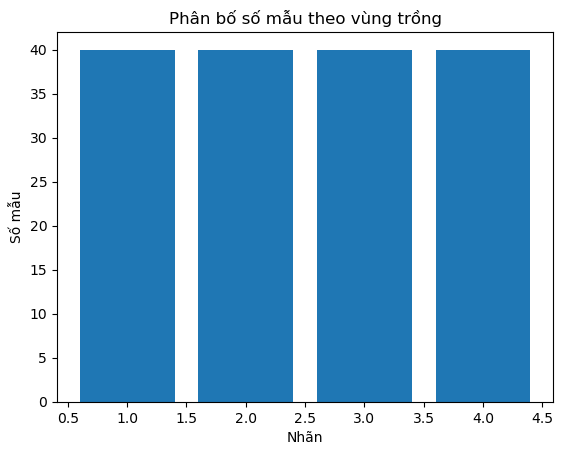

In [168]:
# Count occurrences of each label
unique, counts = np.unique(y_train, return_counts=True)

# Plotting
plt.bar(labels, counts)
plt.xlabel('Nhãn')
plt.ylabel('Số mẫu')
plt.title('Phân bố số mẫu theo vùng trồng')
plt.show()

In [169]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.fit_transform(X_test)
# # scaler = MinMaxScaler()
# # X_train = scaler.fit_transform(X_train)
# # X_test = scaler.fit_transform(X_test)

In [170]:
# onehot = OneHotEncoder(sparse_output=False)
# y_train = onehot.fit_transform(y_train.reshape(-1,1))
# y_test = onehot.fit_transform(y_test.reshape(-1,1))

In [171]:
# X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
# X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [172]:
# import tensorflow as tf
# import random

# tf.random.set_seed(1)
# random.seed(1)
# np.random.seed(1)
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Input(shape=(X_train.shape[1], 1)))
# # model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
# model.add(tf.keras.layers.Conv1D(filters=128, kernel_size=3))
# model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
# model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=3))
# model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
# model.add(tf.keras.layers.Conv1D(filters=32, kernel_size=3))
# model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
# # model.add(tf.keras.layers.Conv1D(filters=16, kernel_size=3))
# # model.add(tf.keras.layers.Conv1D(filters=24, kernel_size=3))
# # model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(16, activation='relu'))
# # model.add(tf.keras.layers.Dense(100, activation='relu'))
# model.add(tf.keras.layers.Dense(y_train.shape[1], activation='softmax'))

# model.compile(optimizer="Adam", loss = 'CategoricalCrossentropy', metrics = ['accuracy'])
# history=model.fit(X_train, y_train, batch_size=12, epochs=24, validation_data=(X_test, y_test))

In [173]:
# plt.plot(history.history['loss'], label='Loss')
# plt.plot(history.history['val_loss'], label='Val loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss value')
# plt.legend()
# plt.show()

# plt.plot(history.history['accuracy'], label='accuracy')
# plt.plot(history.history['val_accuracy'], label='val_accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy value')
# plt.legend()
# plt.show()

In [174]:
# from mlxtend.plotting import plot_confusion_matrix
# y_pred = model.predict(X_test)
# y_pred = np.argmax(y_pred, axis=1)
# y_test_m = np.argmax(y_test, axis=1)
# print(accuracy_score(y_test_m, y_pred))
# # print(precision_score(y_test_m, y_pred))
# # print(recall_score(y_test_m, y_pred))
# # print(f1_score(y_test_m, y_pred))
# cm = confusion_matrix(y_test_m, y_pred)
# fig, ax = plot_confusion_matrix(conf_mat=cm, colorbar=True, figsize=(5,4))
# plt.rcParams.update({'font.size': 11})
# plt.xlabel("Nhãn dự đoán")
# plt.ylabel("Nhãn thực tế")
# plt.show()

In [175]:
# print(classification_report(y_test_m, y_pred))